In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from math import *
from scipy import integrate

### Задание функций

$f(x)=x^2$

Гладкая:

In [29]:
f_smooth = lambda x: sin(5*x)

Разрывная:

In [50]:
def f_dis(x):
    if (x>0):
        return 1
    else:
        return -1

Осциллирующая:

In [31]:
f_osc = lambda x: sin(100*x)*exp(x)

###  Интегрирование

#### Метод трапеций

Простая формула

$\int_{a}^{b}f(t)dt \sim \frac{b-a}{2}(f(a)+f(b))$

Состовная формула

$\int_{a}^{b}f(t)dt \sim \sum_{k=0}^{n-1}h\frac{f(x_k)+f(x_{k+1})}{2}$

$h=\frac{b-a}{n}$

Порядок точности

Из доказанного на семинаре имеем:

$|I-\stackrel{-}{I}_k| \leq c*n*h^2=c*\frac{(b-a)^2}{n}$

Тогда

In [32]:
def myIntegrate(f, left, right, n):
    h = np.float32(right - left) / n
    ans = 0
    x_arr = [left]
    f_arr = [f(left)]
    for i in range(n):
        x0 = left + i * h
        x1 = left + (i + 1) * h
        f1 = f(x1)
        f_arr.append(f1)
        x_arr.append(x1)
        ans += (f(x0) + f1) / 2
    ans *= h
    return ans, x_arr, f_arr

In [33]:
def error(int1, int2):
    return abs(abs(int1) - abs(int2))

In [44]:
def graph(f, left, right, text):
    n_arr = np.arange(5, 100)
    err_arr = []
    for n in n_arr:
        i1, x_arr, f_arr = myIntegrate(f, left, right, n)
        er = error(i1, integrate.quad(f, left, right)[0])
        err_arr.append(er)
    plt.figure(figsize=(15,5))
    plt.subplot(122)
    plt.scatter(n_arr, err_arr, s = 1)
    plt.ylabel('Ошибка')
    plt.xlabel('Число разбиений N')
    plt.subplot(121)
    plt.scatter(x_arr, f_arr, s = 1)
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.title(text)
    plt.show()

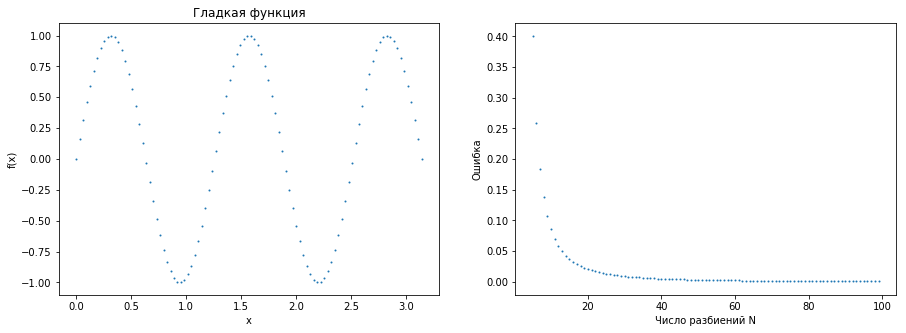

In [45]:
graph(f_smooth, 0, pi, 'Гладкая функция')


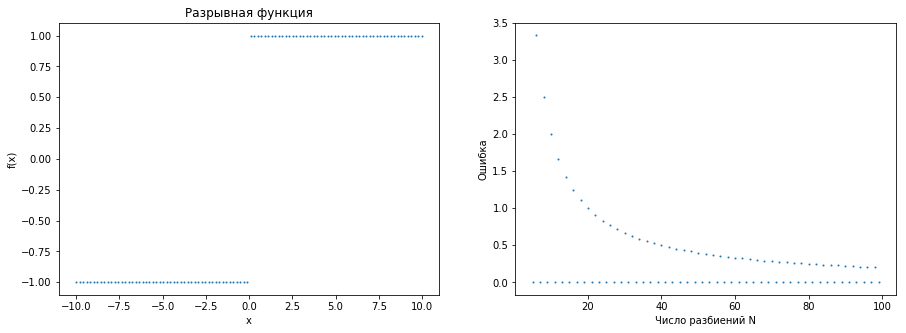

0.0

In [51]:
graph(f_dis, -10, 10, 'Разрывная функция')
integrate.quad(f_dis, -10, 10)[0]

/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


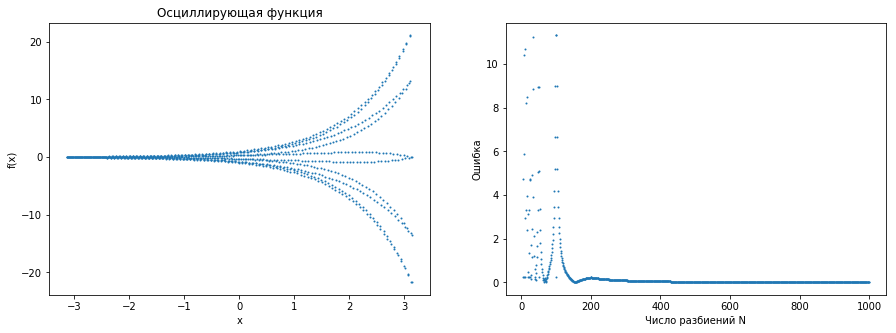

In [43]:
graph(f_osc, -pi, pi, 'Осциллирующая функция')

### Порядок точности

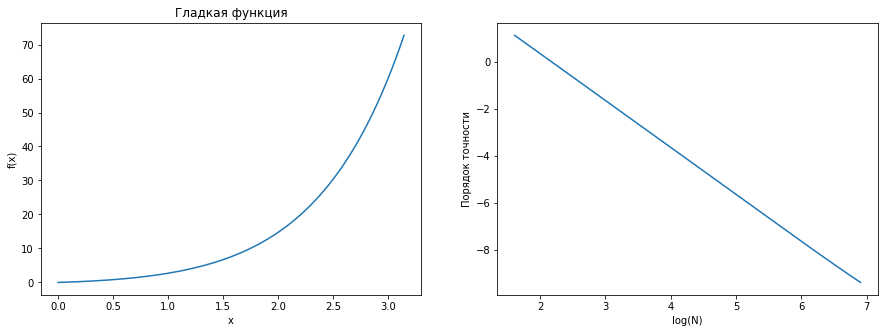

In [171]:
n_arr = np.arange(5, 1000)
err_arr = []
left = 0
right = pi
for n in n_arr:
    i1, x_arr, f_arr = myIntegrate(f_smooth, left, right, n)
    er = error(i1, integrate.quad(f_smooth, left, right)[0])
    err_arr.append(er)
plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(np.log(n_arr), np.log(err_arr))
plt.ylabel('Порядок точности')
plt.xlabel('log(N)')
plt.subplot(121)
plt.plot(x_arr, f_arr)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Гладкая функция')
plt.show()

Получается экспериментально выявлено, что 

$|I-\stackrel{-}{I}_k| \leq c*n*h^2=c*\frac{(b-a)^2}{n}$

соответсвует действительности